In [1]:
# Programmer: Lu Jianzhang
# Time: 2023/9/25

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# 1. Data overview

In [3]:
df_train.shape # Data dimensions

(60000, 16)

In [4]:
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [5]:
df_train.columns

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'furnished', 'lease_commence_date',
       'latitude', 'longitude', 'elevation', 'subzone', 'planning_area',
       'region', 'monthly_rent'],
      dtype='object')

In [6]:
df_train.dtypes.value_counts()

object     10
float64     4
int64       2
dtype: int64

C:\Users\11451\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_rent', ylabel='Density'>

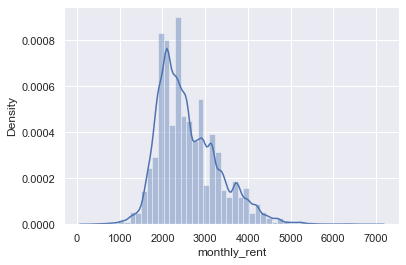

In [7]:
sns.set()
sns.distplot(df_train['monthly_rent'])

In [8]:
print("Skewness: %f" % df_train['monthly_rent'].skew())#Skewness
print("Kurtosis: %f" % df_train['monthly_rent'].kurt())#kurtosis

Skewness: 0.864935
Kurtosis: 0.820031


In [9]:
# df_train['monthly_rent'] = np.log1p(df_train['monthly_rent'])
# sns.distplot(df_train['monthly_rent'])
# plt.show()
# print("Skewness: %f" % df_train['monthly_rent'].skew())
# print("Kurtosis: %f" % df_train['monthly_rent'].kurt())

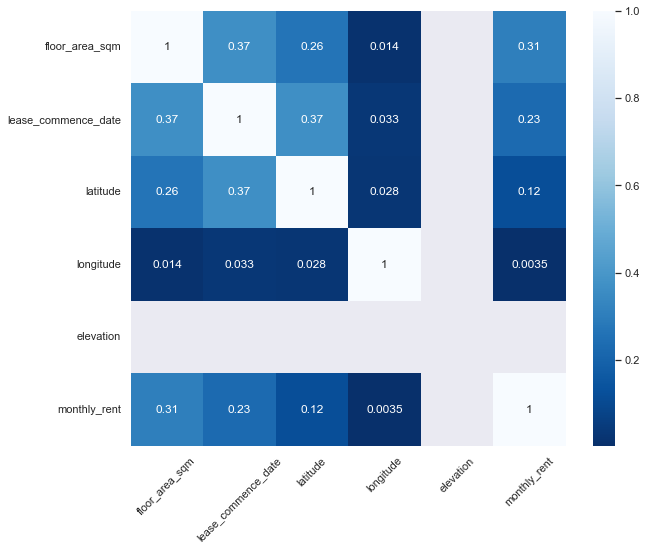

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr().abs(),annot=True,square=True,cmap='Blues_r')
plt.xticks(rotation=45)
plt.show()

# 2. Data cleaning

In [11]:
# Null value handling
df_train[df_train.isnull().T.any()]

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent


In [12]:
# Delete "elevation","furnished"
df_train = df_train.drop(['elevation','furnished'],axis = 1)
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,1983,1.344518,103.738630,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,1978,1.330186,103.938717,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971,1.332242,103.845643,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,1972,1.320502,103.863341,bendemeer,kallang,central region,2100


In [13]:
# Clean the "flat_type"
df = df_train.copy()
df.loc[df['flat_type']=='2 room','flat_type']='2-room'
df.loc[df['flat_type']=='3 room','flat_type']='3-room'
df.loc[df['flat_type']=='4 room','flat_type']='4-room'
df.loc[df['flat_type']=='5 room','flat_type']='5-room'
df['flat_type'].unique()

array(['3-room', '4-room', 'executive', '5-room', '2-room'], dtype=object)

In [14]:
# Clean the "flat_model"
df['flat_model'].unique()

array(['new generation', 'improved', 'apartment', 'premium apartment',
       'simplified', 'model a', 'standard', 'dbss', 'model a2',
       'maisonette', 'model a-maisonette', 'type s1', 'adjoined flat',
       'type s2', 'premium apartment loft', '2-room',
       'premium maisonette', 'terrace', '3gen'], dtype=object)

In [15]:
# Clean the "region"
df['region'].unique()

array(['west region', 'east region', 'central region',
       'north-east region', 'north region'], dtype=object)

In [16]:
# Clean the "town"
df['town'].unique()

array(['jurong east', 'bedok', 'toa payoh', 'pasir ris',
       'kallang/whampoa', 'bukit panjang', 'sengkang', 'ang mo kio',
       'bishan', 'punggol', 'choa chu kang', 'clementi', 'bukit batok',
       'sembawang', 'jurong west', 'woodlands', 'queenstown', 'yishun',
       'bukit timah', 'marine parade', 'bukit merah', 'geylang',
       'hougang', 'tampines', 'serangoon', 'central'], dtype=object)

In [17]:
# Clean the "planning_area"
df['planning_area'].unique()

array(['jurong east', 'bedok', 'toa payoh', 'pasir ris', 'kallang',
       'bukit panjang', 'sengkang', 'ang mo kio', 'bishan', 'punggol',
       'choa chu kang', 'clementi', 'bukit batok', 'sembawang',
       'jurong west', 'woodlands', 'queenstown', 'yishun', 'bukit timah',
       'marine parade', 'bukit merah', 'geylang', 'hougang', 'tampines',
       'serangoon', 'rochor', 'downtown core', 'outram', 'novena'],
      dtype=object)

In [18]:
# Clean the "street"
df['street_name'].unique()
df['street_name'].value_counts()

ang mo kio avenue 3      480
yishun ring road         473
ang mo kio avenue 10     463
bedok reservoir road     385
Ang Mo Kio Avenue 3      351
                        ... 
Kreta Ayer Road            1
Marine Parade Central      1
seng poh road              1
Jurong West Street 51      1
Zion Road                  1
Name: street_name, Length: 1083, dtype: int64

In [19]:
# Clean the "subzone"
df['subzone'].unique()
df['subzone'].value_counts()

tampines east          2469
bedok north            1644
jurong west central    1496
woodlands east         1318
punggol field          1203
                       ... 
bencoolen                12
moulmein                 11
kampong bugis             9
frankel                   8
ulu pandan                8
Name: subzone, Length: 152, dtype: int64

# 4. Attributes encoding

In [20]:
# Encode "lease_commence_date"
df['lease_commence_date'] = df.apply(lambda x: int(x['rent_approval_date'][0:4])-x['lease_commence_date'],axis = 1)
df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3-room,new generation,67.0,38,1.344518,103.738630,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,44,1.330186,103.938717,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,51,1.332242,103.845643,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,28,1.370239,103.962894,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,50,1.320502,103.863341,bendemeer,kallang,central region,2100


In [21]:
# Encode "rent_approval_date"
# related to the climate of economy
df['rent_year'] = df.apply(lambda x: x['rent_approval_date'][0:4],axis=1)
df['rent_month'] = df.apply(lambda x: x['rent_approval_date'][5:7],axis=1)
df = df.drop(['rent_approval_date'],axis=1)
df_year = df.pop('rent_year')
df_month = df.pop('rent_month')
df.insert(0,'rent_year',df_year)
df.insert(1,'rent_month',df_month)

df.head()

,rent_year,rent_month,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent
0,2021,09,jurong east,257,Jurong East Street 24,3-room,new generation,67.0,38,1.344518,103.738630,yuhua east,jurong east,west region,1600
1,2022,05,bedok,119,bedok north road,4-room,new generation,92.0,44,1.330186,103.938717,bedok north,bedok,east region,2250
2,2022,10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,51,1.332242,103.845643,toa payoh central,toa payoh,central region,1900
3,2021,08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,28,1.370239,103.962894,pasir ris drive,pasir ris,east region,2850
4,2022,11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,50,1.320502,103.863341,bendemeer,kallang,central region,2100


In [22]:
# Delete "block", "planning_area", "street_name"
# related to the selection of attributes to address

df.drop(["block","planning_area","street_name"], axis=1,inplace=True)

In [23]:
# Encode "flat_model"
df['flat_model'] = df['flat_type'] + "_" + df['flat_model']
df['flat_model'].unique()
# Clean "flat_model"
df = df.loc[~(df['flat_model']=='5-room_3gen')]
df = df.loc[~(df['flat_model']=='2-room_premium apartment')]
df = df.loc[~(df['flat_model']=='4-room_terrace')]

# 5. Auxiliary data import

In [24]:
# Encode "latitude", "longitude"
# related to the distance of MRT and school
# df_mrt = pd.read_csv('auxiliary-data/sg-mrt-existing-stations.csv')
# df_school = pd.read_csv('auxiliary-data/sg-primary-schools.csv')
# df_shopping = pd.read_csv('auxiliary-data/sg-shopping-malls.csv')
'''
minDist_MRT: Straight line distance to nearest subway station
minDist_school: Straight line distance to nearest primary school
minDist_mall: Straight line distance to the nearest shopping mall
MRT_cnt_500: Number of subway stations within a straight line distance of 500 meters
'''
df.drop(["latitude", "longitude"], axis=1,inplace=True)
gps_processed = pd.read_csv('auxiliary-data/GPS_processed.csv')
df.reset_index(inplace=True)
df = df.merge(gps_processed, on='index')
df = df[['index', 'rent_year', 'rent_month', 'town','subzone', 'flat_type', 'flat_model','floor_area_sqm', 'lease_commence_date', 'region',
       'minDist_MRT', 'minDist_school', 'minDist_mall', 'monthly_rent','MRT_cnt_500']]
df.drop('index', axis=1,inplace=True)
df.head()

,rent_year,rent_month,town,subzone,flat_type,flat_model,floor_area_sqm,lease_commence_date,region,minDist_MRT,minDist_school,minDist_mall,monthly_rent,MRT_cnt_500
0,2021,09,jurong east,yuhua east,3-room,3-room_new generation,67.0,38,west region,0.699127,0.334846,1.202674,1600,0
1,2022,05,bedok,bedok north,4-room,4-room_new generation,92.0,44,east region,0.898991,0.607716,1.114338,2250,0
2,2022,10,toa payoh,toa payoh central,3-room,3-room_improved,67.0,51,central region,0.218603,0.425760,0.468297,1900,1
3,2021,08,pasir ris,pasir ris drive,executive,executive_apartment,149.0,28,east region,1.546040,0.564969,0.402359,2850,0
4,2022,11,kallang/whampoa,bendemeer,3-room,3-room_improved,68.0,50,central region,0.187856,0.271723,1.073354,2100,1


In [25]:
# Encoding market_index
stock_processed=pd.read_csv('auxiliary-data/stock_processed.csv')
stock_processed['date'] = stock_processed['year'].astype(str) + '-' + stock_processed['month'].astype(str).str.zfill(2)
df['date'] = df['rent_year'].astype(str) + '-' + df['rent_month'].astype(str).str.zfill(2)
df= pd.merge(df, stock_processed[['date', 'market_index']], on='date', how='left')
df=df.drop(columns='date')
df = df[['rent_year', 'rent_month', 'town','subzone', 'flat_type', 'flat_model','floor_area_sqm', 'lease_commence_date', 'region',
       'minDist_MRT', 'minDist_school', 'minDist_mall', 'market_index','monthly_rent','MRT_cnt_500']]
df.head()

,rent_year,rent_month,town,subzone,flat_type,flat_model,floor_area_sqm,lease_commence_date,region,minDist_MRT,minDist_school,minDist_mall,market_index,monthly_rent,MRT_cnt_500
0,2021,09,jurong east,yuhua east,3-room,3-room_new generation,67.0,38,west region,0.699127,0.334846,1.202674,1.04,1600,0
1,2022,05,bedok,bedok north,4-room,4-room_new generation,92.0,44,east region,0.898991,0.607716,1.114338,-3.71,2250,0
2,2022,10,toa payoh,toa payoh central,3-room,3-room_improved,67.0,51,central region,0.218603,0.425760,0.468297,-1.19,1900,1
3,2021,08,pasir ris,pasir ris drive,executive,executive_apartment,149.0,28,east region,1.546040,0.564969,0.402359,-3.53,2850,0
4,2022,11,kallang/whampoa,bendemeer,3-room,3-room_improved,68.0,50,central region,0.187856,0.271723,1.073354,6.42,2100,1


In [26]:
# Encoding coe_index
coe_index=pd.read_csv('auxiliary-data/coe_index.csv')
coe_index['date'] = coe_index['year'].astype(str) + '-' + coe_index['month'].astype(str).str.zfill(2)
df['date'] = df['rent_year'].astype(str) + '-' + df['rent_month'].astype(str).str.zfill(2)
df= pd.merge(df, coe_index[['date', 'coe_index']], on='date', how='left')
df=df.drop(columns='date')
df = df[['rent_year', 'rent_month', 'town','subzone','flat_type', 'flat_model','floor_area_sqm', 'lease_commence_date', 'region',
       'minDist_MRT', 'minDist_school', 'minDist_mall', 'market_index','coe_index','monthly_rent','MRT_cnt_500']]
df.head()

,rent_year,rent_month,town,subzone,flat_type,flat_model,floor_area_sqm,lease_commence_date,region,minDist_MRT,minDist_school,minDist_mall,market_index,coe_index,monthly_rent,MRT_cnt_500
0,2021,09,jurong east,yuhua east,3-room,3-room_new generation,67.0,38,west region,0.699127,0.334846,1.202674,1.04,21.9723,1600,0
1,2022,05,bedok,bedok north,4-room,4-room_new generation,92.0,44,east region,0.898991,0.607716,1.114338,-3.71,30.8103,2250,0
2,2022,10,toa payoh,toa payoh central,3-room,3-room_improved,67.0,51,central region,0.218603,0.425760,0.468297,-1.19,35.8308,1900,1
3,2021,08,pasir ris,pasir ris drive,executive,executive_apartment,149.0,28,east region,1.546040,0.564969,0.402359,-3.53,20.8020,2850,0
4,2022,11,kallang/whampoa,bendemeer,3-room,3-room_improved,68.0,50,central region,0.187856,0.271723,1.073354,6.42,39.7925,2100,1


In [27]:
# Temp Change
df.drop(['flat_type','rent_year','rent_month'], axis=1,inplace=True)

In [28]:
# # One-hot Encode "town", "region" # Catboost encoder
# df = pd.get_dummies(df)
df.head()

,town,subzone,flat_model,floor_area_sqm,lease_commence_date,region,minDist_MRT,minDist_school,minDist_mall,market_index,coe_index,monthly_rent,MRT_cnt_500
0,jurong east,yuhua east,3-room_new generation,67.0,38,west region,0.699127,0.334846,1.202674,1.04,21.9723,1600,0
1,bedok,bedok north,4-room_new generation,92.0,44,east region,0.898991,0.607716,1.114338,-3.71,30.8103,2250,0
2,toa payoh,toa payoh central,3-room_improved,67.0,51,central region,0.218603,0.425760,0.468297,-1.19,35.8308,1900,1
3,pasir ris,pasir ris drive,executive_apartment,149.0,28,east region,1.546040,0.564969,0.402359,-3.53,20.8020,2850,0
4,kallang/whampoa,bendemeer,3-room_improved,68.0,50,central region,0.187856,0.271723,1.073354,6.42,39.7925,2100,1


# 6. Data visualization and outlier processing

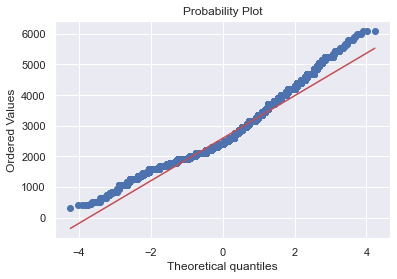

In [29]:
# ----Temp change
# Delete outliers
# Remove outliers based on 5 times standard deviation of 'monthly_rent'
df = df[np.abs(df['monthly_rent']-df['monthly_rent'].mean())<=(5 * df['monthly_rent'].std())]

# QQ plot, the slope of the plot represents the standard deviation, the intercept is the mean

res = stats.probplot(df['monthly_rent'], plot=plt)

In [30]:
df.to_csv('cleaned_train.csv', index=False)

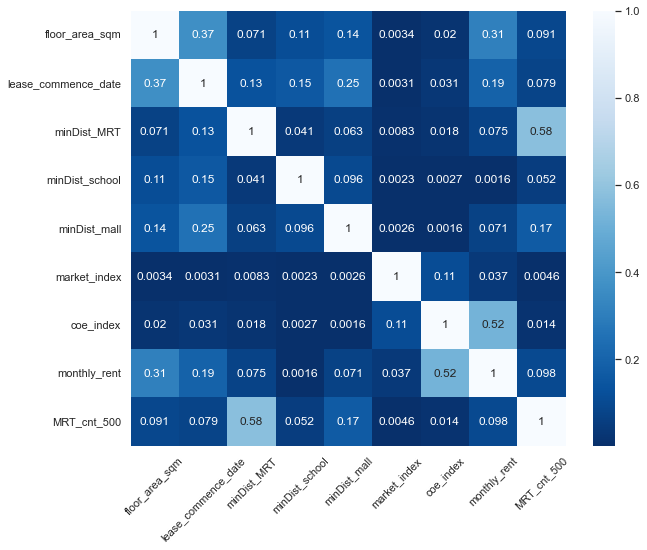

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=True,square=True,cmap='Blues_r')
plt.xticks(rotation=45)
plt.show()